# K ***Mean Clustring***

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline

In [3]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23 )

In [4]:
X.shape

(1000, 2)

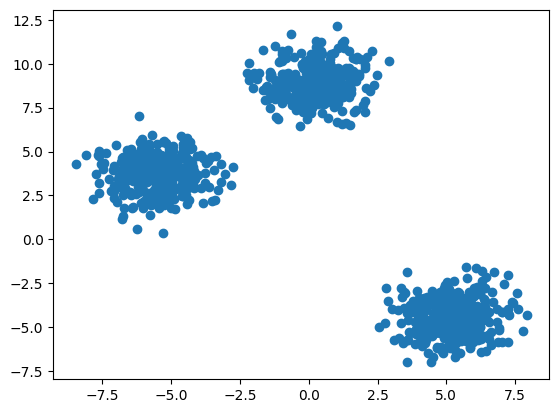

In [6]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

# **method 1 Manual process(find value of k)**

In [8]:
from sklearn.cluster import KMeans

In [13]:
# Elbow Method( find the value of 'k'(means how many clusters are formed) )
wcss=[]
for i in range(1,11):
  kmean=KMeans(n_clusters=i,init='k-means++')
  kmean.fit(X_train)
  wcss.append(kmean.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [14]:
wcss

[34827.57682552021,
 7935.437286145418,
 1319.2730531585612,
 1140.4677884655125,
 992.0866512884327,
 853.7686138905091,
 761.9314364119673,
 663.79128746268,
 579.300300483465,
 532.8578484322561]

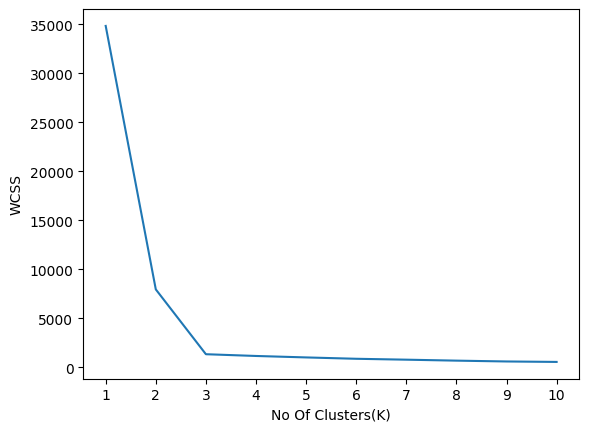

In [17]:
#plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))  # axis pr 1,2,3,4,5,6... ke range m no aien gy
plt.xlabel("No Of Clusters(K)")
plt.ylabel("WCSS")
plt.show()

the above graph show that no of k is 3 (3 clusters are formed)

In [20]:
# train the model
y_labels=kmean.fit_predict(X_train)   # y_labels is output against X_train  ,'fit_predict' for training data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


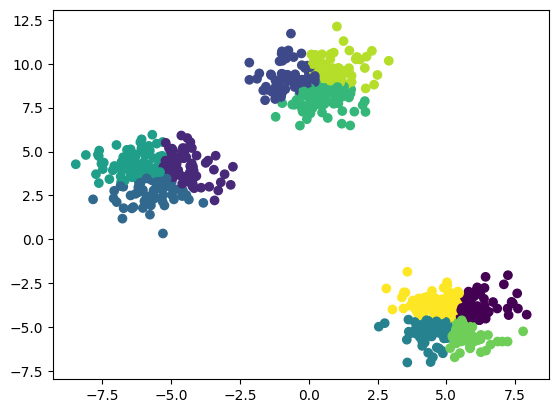

In [22]:

plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)
plt.show()

# Evaluate model for test data

In [27]:
y_test_labels=kmean.predict(X_test)   ,# perdict command for X_test

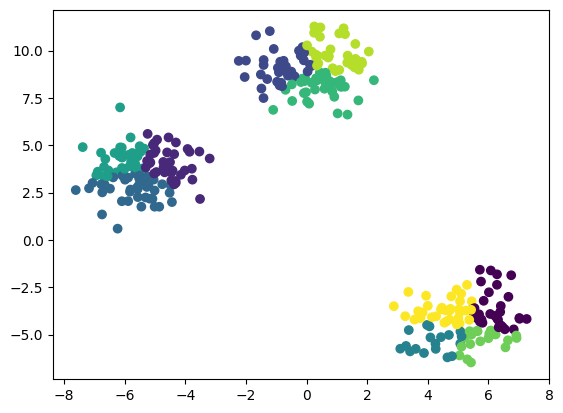

In [28]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_labels)
plt.show()

# **method 2(find value of k using keelocator)**

In [30]:
pip install kneed

In [31]:
from kneed import KneeLocator

In [33]:
# this code give the value of k
kl=KneeLocator(range(1,11),wcss,curve="convex",direction='decreasing')            # convex=decrease,concave=increase
kl.elbow

3

# plotting silhouette score


In [34]:
from sklearn.metrics import silhouette_score

In [38]:
silhouette_coefficient = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    silhouette_coefficient.append(score)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [40]:
silhouette_coefficient

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.4814001336222496,
 0.33546405990172856,
 0.34520917727457456,
 0.3422884318235719,
 0.3459180120555128,
 0.3422676163253423]

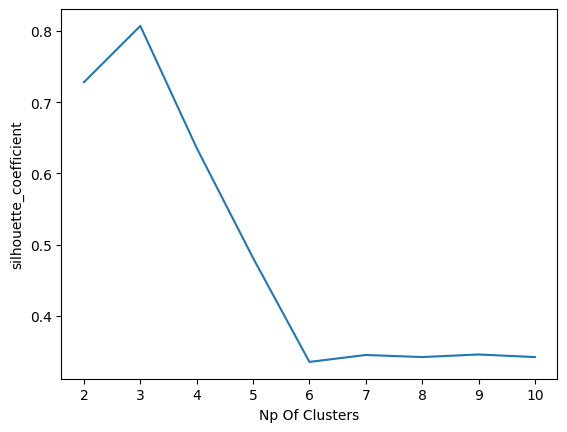

In [43]:
# plot silhouette score(range -1 to +1)
plt.plot(range(2,11),silhouette_coefficient)
plt.xticks(range(2,11))
plt.xlabel("Np Of Clusters")
plt.ylabel("silhouette_coefficient")
plt.show()


